# Introduction 
Toronto is an international city locate at Ontario, Canada. People come from different counties work, study or immigrate  to Toronto. This is the reason why this multi-culture city has different style restaurants, such as Chinese restaurants, Japanese restaurant, French restaurant, Mexico Restaurant etc. 

This project is going to find the best place to open an new and high-end western-style restaurants. There are some factors that need to consider: 1, average income of neighborhood, 2,Population of neighborhood, and the 3, competition.

The data use is 
https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods
to explore neighborhood average income and population 
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
to explore location of neighborhood 
and
Foursquare API

## Access neighborhood and the location

In [49]:
pip install lxml


Note: you may need to restart the kernel to use updated packages.


In [50]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



In [51]:
import pandas as pd
import numpy as np
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
df = pd.read_html(url)
df = df[0]
df = df.drop(df[df['Borough'] ==  'Not assigned'].index)
df = df.reset_index(drop=True)
df['Neighborhood'].fillna(df['Borough'], inplace=True)
coor = pd.read_csv("https://cocl.us/Geospatial_data")
df = pd.merge(df, coor, on='Postal Code', how='left')

df = (df.set_index(df.columns.drop('Neighborhood',1).tolist())
   .Neighborhood.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'Neighborhood'})
   .loc[:, df.columns])
  
df.head(5)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,M6A,North York,Lawrence Manor,43.718518,-79.464763


In [52]:
df.shape

(217, 5)

## Access the data of neighborhood average income and population

In [53]:
nei = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods')
nei = nei[1]
nei.head(5)

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN


In [54]:
nei = nei[['Name', 'Population','Average Income']]
nei.drop(nei[nei['Name'] == 'Toronto CMA Average'].index, axis = 0, inplace = True)
nei.head()

,Name,Population,Average Income
1,Agincourt,44577,25750
2,Alderwood,11656,35239
3,Alexandra Park,4355,19687
4,Allenby,2513,245592
5,Amesbury,17318,27546


In [55]:
nei.rename(columns={'Name':'Neighborhood'}, inplace=True)

In [56]:
nei.mean()

Population        13883.758621
Average Income    49333.936782
dtype: float64

## Box plot of population and average income

In [58]:
    import matplotlib as mpl
import matplotlib.pyplot as plt

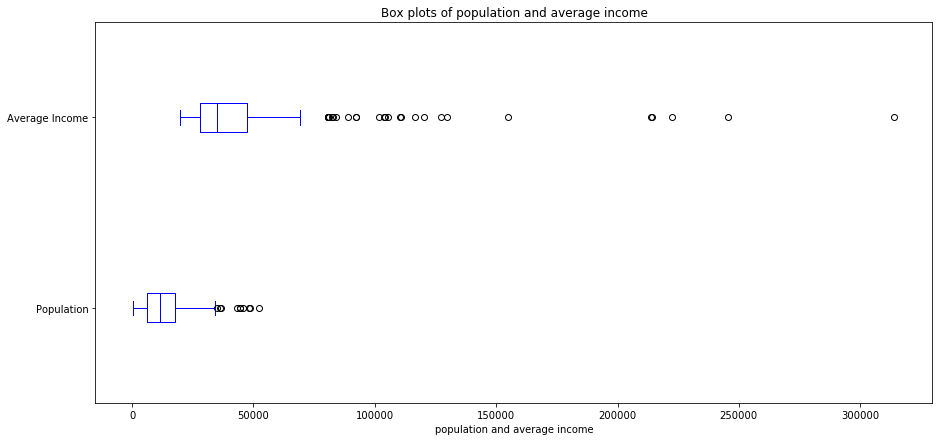

In [90]:

nei.plot(kind='box', figsize=(15, 7), color='blue', vert=False)

plt.title('Box plots of population and average income')
plt.xlabel('population and average income')

plt.show()

## Find out the top population neighborhood

In [57]:
nei_pop20 = nei.sort_values(by='Population', ascending = False).head(20)

nei_pop20.set_index('Neighborhood', inplace=True)
nei_pop20

,Population,Average Income
Neighborhood,,
Old East York,52220,33172
Woburn,48507,26190
Elia (Jane and Finch),48003,22691
L'Amoreaux,45862,26375
Agincourt,44577,25750
Malvern,44324,25677
Willowdale,43144,39895
Downsview,36613,26751
Newtonbrook,36046,33428


<function matplotlib.pyplot.show(*args, **kw)>

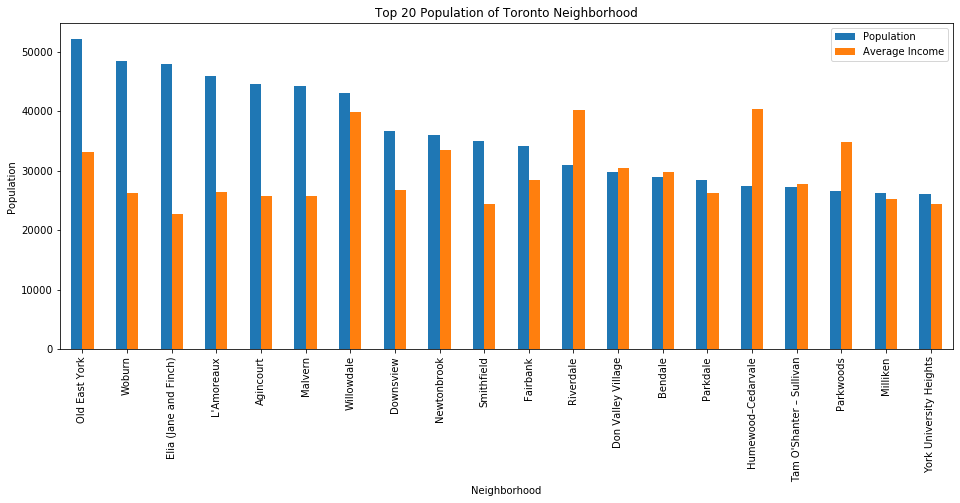

In [59]:


nei_pop20.plot(kind='bar', figsize=(16,6))
plt.xlabel('Neighborhood')
plt.ylabel('Population')
plt.title('Top 20 Population of Toronto Neighborhood')
plt.show

## The relationship of income and population 

## Find out the top average income neighborhood

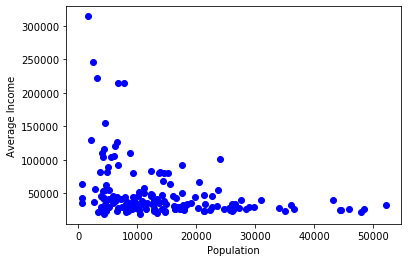

In [60]:
plt.scatter(nei.Population, nei['Average Income'],  color='blue')
plt.xlabel("Population")
plt.ylabel("Average Income")
plt.show()

In [61]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(nei[['Population']])
y = np.asanyarray(nei[['Average Income']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-1.22622096]]


In [62]:
nei_in = nei.sort_values(by='Average Income', ascending = False)
nei_in = nei_in.sort_values(by='Average Income', ascending = True)
nei_in.set_index('Neighborhood', inplace = True)
nei_in.head()

,Population,Average Income
Neighborhood,,
Regent Park/Trefann Court,10387,19521
Alexandra Park,4355,19687
Oakridge,13368,21155
Harwood,3375,22136
St. James Town,14666,22341


<function matplotlib.pyplot.show(*args, **kw)>

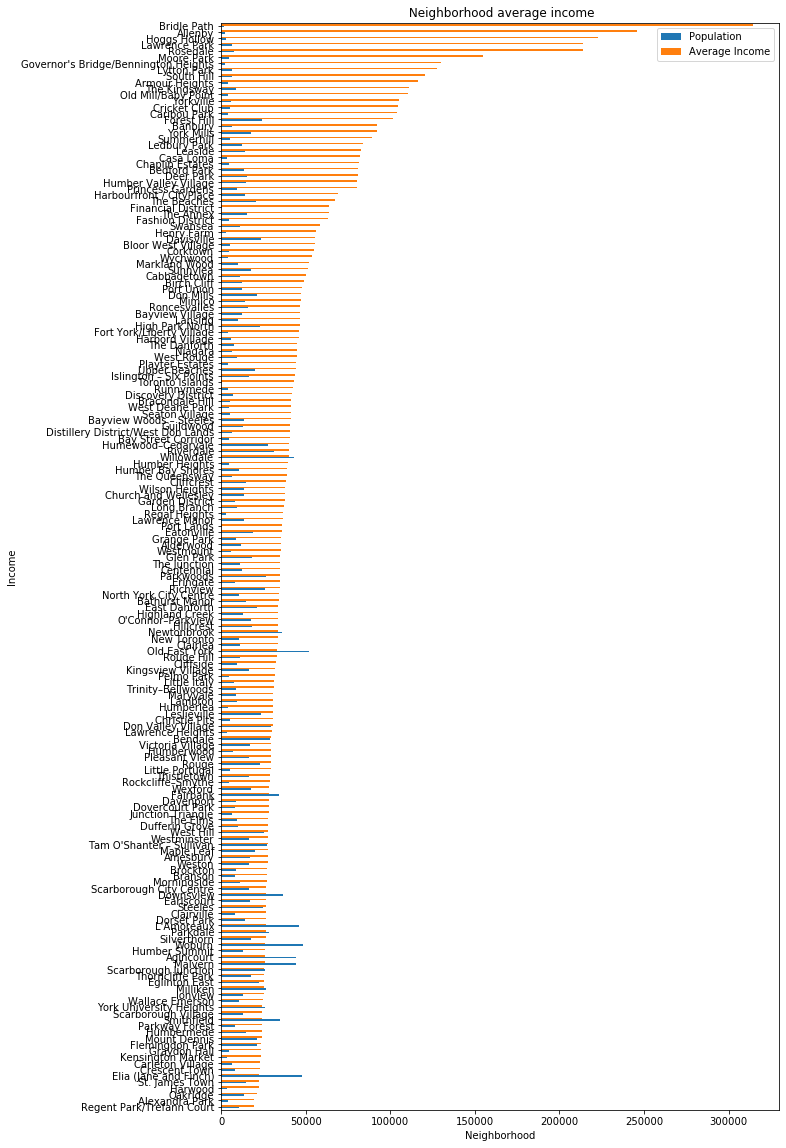

In [63]:
nei_in.plot(kind='barh', figsize=(10,20))
plt.xlabel('Neighborhood')
plt.ylabel('Income')
plt.title(' Neighborhood average income')
plt.show

In [64]:
nei_inc20 = nei.sort_values(by='Average Income', ascending = False).head(25)
nei_inc20 = nei_inc20.sort_values(by='Average Income', ascending = True)
nei_inc20.set_index('Neighborhood', inplace = True)
nei_inc20.head()

,Population,Average Income
Neighborhood,,
Deer Park,15165,80704
Bedford Park,13749,80827
Chaplin Estates,4906,81288
Casa Loma,3597,82203
Leaside,13876,82670


<function matplotlib.pyplot.show(*args, **kw)>

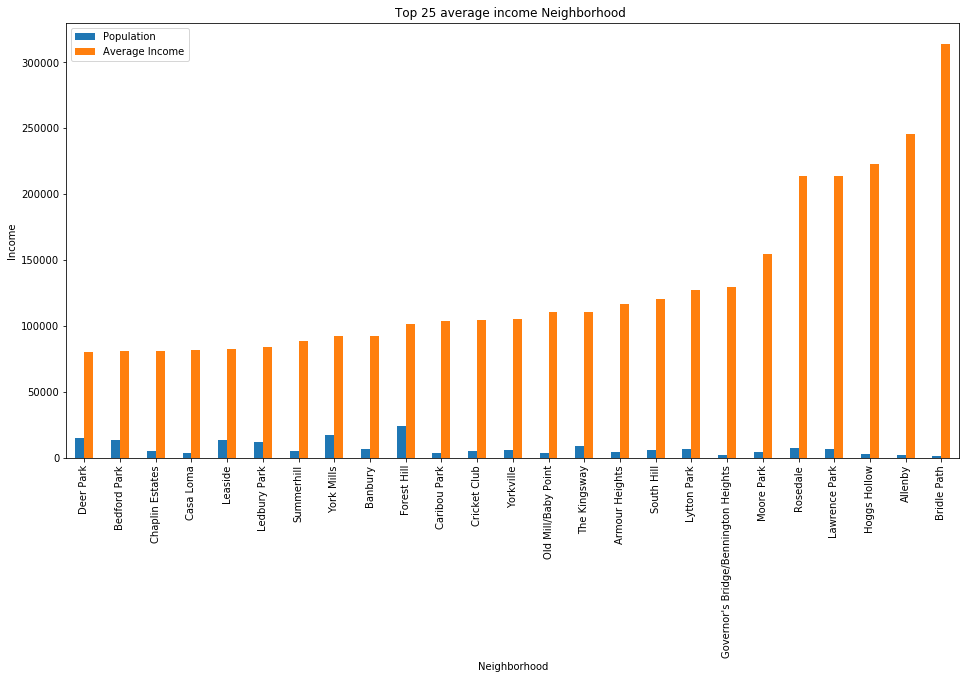

In [65]:
nei_inc20.plot(kind='bar', figsize=(16, 8))
plt.xlabel('Neighborhood')
plt.ylabel('Income')
plt.title('Top 25 average income Neighborhood ')
plt.show

There are slight negative relationship of average income and population, so we are focus on the income 

## Access venues of high income area

In [66]:
topinc20nei = nei_inc20._stat_axis.values.tolist() 
topinc20nei

['Deer Park',
 'Bedford Park',
 'Chaplin Estates',
 'Casa Loma',
 'Leaside',
 'Ledbury Park',
 'Summerhill',
 'York Mills',
 'Banbury',
 'Forest Hill',
 'Caribou Park',
 'Cricket Club',
 'Yorkville',
 'Old Mill/Baby Point',
 'The Kingsway',
 'Armour Heights',
 'South Hill',
 'Lytton Park',
 "Governor's Bridge/Bennington Heights",
 'Moore Park',
 'Rosedale',
 'Lawrence Park',
 'Hoggs Hollow',
 'Allenby',
 'Bridle Path']

In [67]:
CLIENT_ID =  'KOZQP1BWJ3ZSZ5SEPN1ZBIY1RPQYBQGNAIWQM2BTQQLN12VA'
CLIENT_SECRET = 'GI3YUDMVXSD3NLKDKYV41TTYZ4T1VVGLAXKKEAKBUT24XSBS' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

df.loc[0, 'Neighborhood']

neighborhood_latitude = df.loc[0, 'Latitude']
neighborhood_longitude = df.loc[0, 'Longitude'] 

neighborhood_name = df.loc[0, 'Neighborhood'] 

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Your credentails:
CLIENT_ID: KOZQP1BWJ3ZSZ5SEPN1ZBIY1RPQYBQGNAIWQM2BTQQLN12VA
CLIENT_SECRET:GI3YUDMVXSD3NLKDKYV41TTYZ4T1VVGLAXKKEAKBUT24XSBS
Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


In [68]:
LIMIT = 200
radius = 1200
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [69]:
import requests 
from pandas.io.json import json_normalize 

In [70]:
results = requests.get(url).json()
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']



venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,Allwyn's Bakery,Caribbean Restaurant,43.759840,-79.324719
1,Brookbanks Park,Park,43.751976,-79.332140
2,Donalda Golf & Country Club,Golf Course,43.752816,-79.342741
3,Tim Hortons,Café,43.760668,-79.326368
4,A&W,Fast Food Restaurant,43.760643,-79.326865


In [71]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


In [72]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            'KOZQP1BWJ3ZSZ5SEPN1ZBIY1RPQYBQGNAIWQM2BTQQLN12VA', 
            'GI3YUDMVXSD3NLKDKYV41TTYZ4T1VVGLAXKKEAKBUT24XSBS', 
            '20180604', 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']      
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [73]:

df_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park
 Harbourfront
Lawrence Manor
 Lawrence Heights
Queen's Park
 Ontario Provincial Government
Islington Avenue
 Humber Valley Village
Malvern
 Rouge
Don Mills
Parkview Hill
 Woodbine Gardens
Garden District
 Ryerson
Glencairn
West Deane Park
 Princess Gardens
 Martin Grove
 Islington
 Cloverdale
Rouge Hill
 Port Union
 Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate
 Bloordale Gardens
 Old Burnhamthorpe
 Markland Wood
Guildwood
 Morningside
 West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor
 Wilson Heights
 Downsview North
Thorncliffe Park
Richmond
 Adelaide
 King
Dufferin
 Dovercourt Village
Scarborough Village
Fairview
 Henry Farm
 Oriole
Northwood Park
 York University
East Toronto
 Broadview North (Old East York)
Harbourfront East
 Union Station
 Toronto Islands
Little Portugal
 Trinity
Kennedy Park
 Ionview
 East Birchmo

In [74]:
print(df_venues.shape)
df_venues.head()

(4307, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,TTC stop #8380,43.752672,-79.326351,Bus Stop
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


## competitors in neighborhood 
 also, we are not looking at the Fast Food restaurant

In [75]:
df_venues_r = df_venues[df_venues['Venue Category'].str.contains("Restaurant")]
df_venues_r = df_venues_r.drop(df_venues_r[df_venues_r['Venue Category'] == 'Fast Food Restaurant'].index)



In [76]:
df_venues_r = df_venues_r.reset_index(drop = True)
df_venues_r.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
1,Victoria Village,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant
2,Regent Park,43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
3,Regent Park,43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant
4,Regent Park,43.654260,-79.360636,El Catrin,43.650601,-79.358920,Mexican Restaurant


In [77]:
df_venues_r.shape

(877, 7)

In [78]:
filter_df = df_venues_r.groupby('Neighborhood').count()
filter_df = filter_df[filter_df['Venue Category']<5]
filter_df 

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt North,1,1,1,1,1,1
Cliffcrest,1,1,1,1,1,1
Deer Park,4,4,4,4,4,4
Dovercourt Village,1,1,1,1,1,1
Downsview North,3,3,3,3,3,3
...,...,...,...,...,...,...
Thorncliffe Park,4,4,4,4,4,4
Victoria Village,2,2,2,2,2,2
Westmount,2,2,2,2,2,2


In [79]:
df_venues_r_inc20 = df_venues_r[df_venues_r['Neighborhood'].isin(topinc20nei)]

In [80]:
df_venues_r_inc20=df_venues_r_inc20.reset_index()

In [81]:
    df_venues_r_inc20
    
    


,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,113,Leaside,43.709060,-79.363452,The Leaside Pub,43.710492,-79.363831,Restaurant
1,114,Leaside,43.709060,-79.363452,Kintako Japanese Restaurant,43.711597,-79.363962,Sushi Restaurant
2,115,Leaside,43.709060,-79.363452,Mucho Burrito Fresh Mexican Grill,43.706746,-79.361707,Mexican Restaurant
3,499,Bedford Park,43.733283,-79.419750,Darbar Persian Grill,43.735484,-79.420006,Restaurant
4,500,Bedford Park,43.733283,-79.419750,Satay on the Road,43.735310,-79.419783,Thai Restaurant
5,501,Bedford Park,43.733283,-79.419750,The Copper Chimney,43.736195,-79.420271,Indian Restaurant
6,502,Bedford Park,43.733283,-79.419750,Francobollo,43.734557,-79.419549,Italian Restaurant
7,503,Bedford Park,43.733283,-79.419750,Sakura Garden,43.733398,-79.419491,Sushi Restaurant
8,504,Bedford Park,43.733283,-79.419750,Drums N Flats,43.735035,-79.420040,Comfort Food Restaurant
9,505,Bedford Park,43.733283,-79.419750,Karbouzi Greek Taverna,43.736204,-79.420359,Greek Restaurant


In the high income area, there are 3 neighborhood have resturant 

In [82]:
df_venues_r_inc20.groupby('Neighborhood').count()

,index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Bedford Park,10,10,10,10,10,10,10
Leaside,3,3,3,3,3,3,3
Moore Park,1,1,1,1,1,1,1


Take off 2 neighborhood above, we now looking for the population at high income area 

In [83]:
nei_inc20 = nei.sort_values(by='Average Income', ascending = False).head(25)

nei_inc20.set_index('Neighborhood', inplace = True)
nei_inc20.head()

,Population,Average Income
Neighborhood,,
Bridle Path,1540,314107
Allenby,2513,245592
Hoggs Hollow,3123,222560
Lawrence Park,6653,214110
Rosedale,7672,213941


In [84]:
nei_inc20.drop(['Bedford Park','Leaside','Moore Park'], inplace = True)

In [85]:
nei_inc20 = nei_inc20.sort_values(by=['Population'], ascending = False)

In [86]:
nei_inc20

,Population,Average Income
Neighborhood,,
Forest Hill,24056,101631
York Mills,17564,92099
Deer Park,15165,80704
Ledbury Park,12360,83853
The Kingsway,8780,110944
Rosedale,7672,213941
Lawrence Park,6653,214110
Banbury,6641,92319
Lytton Park,6494,127356


In [87]:
nei_pop2= nei_inc20.drop('Average Income', axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

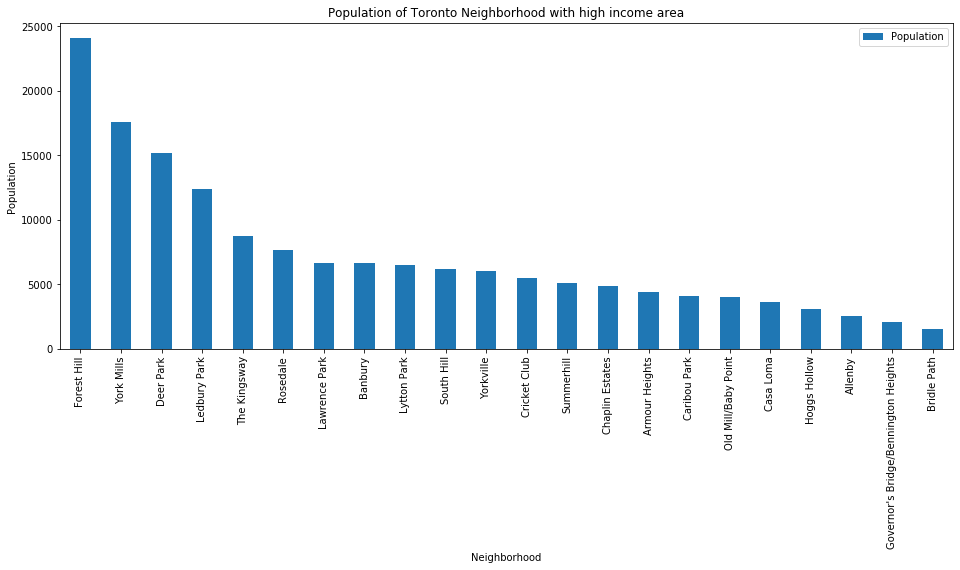

In [88]:
nei_pop2.plot(kind='bar', figsize=(16,6))
plt.xlabel('Neighborhood')
plt.ylabel('Population')
plt.title('Population of Toronto Neighborhood with high income area')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

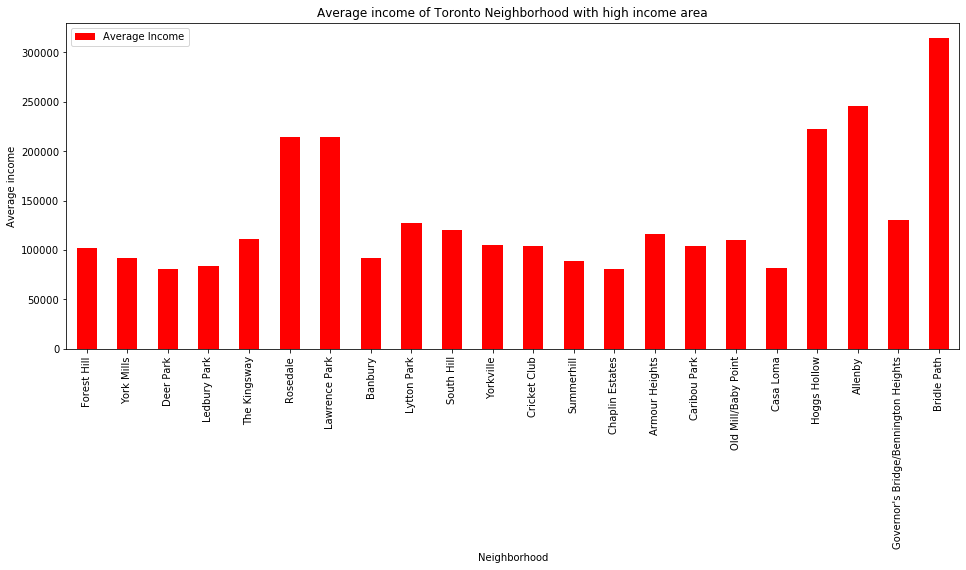

In [89]:
nei_inc2= nei_inc20.drop('Population', axis=1)
nei_inc2.plot(kind='bar', figsize=(16,6), color = 'red')
plt.xlabel('Neighborhood')
plt.ylabel('Average income')
plt.title('Average income of Toronto Neighborhood with high income area')
plt.show

# Recommendation 